# 크롤링

### 실행여부 확인

* Chromedriver와 selenium버전이 호환이 안될 수 있음
* 나의 경우 selenium 4.0.0으로 다운그레이드 후 진행

In [58]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [1]:
import selenium
print(selenium.__version__)

4.0.0


In [2]:
# 인스타 URL
def insta_searching(word):
    url = 'https://www.instagram.com/explore/tags/' + word
    return url

In [4]:
# 로그인
from selenium import webdriver
from selenium.webdriver.common.by import By
import time

# 크롬 드라이버를 로드
driver = webdriver.Chrome('D:/chromedriver/chromedriver.exe')

# 로그인 페이지로 이동
driver.get('https://www.instagram.com/accounts/login/')
time.sleep(2)

# 사용자 이름과 비밀번호를 입력
username = driver.find_element(By.NAME, 'username')
password = driver.find_element(By.NAME, 'password')
username.send_keys('chuncm@naver.com')
password.send_keys('970dnswjsqud0402!')

# 로그인 버튼을 클릭
login_button = driver.find_element(By.XPATH, '//button[@type="submit"]')
login_button.click()
time.sleep(5)

word = '인터넷쇼핑'
url = insta_searching(word)
driver.get(url)

C:\Users\chunc\AppData\Local\Temp\ipykernel_26368\263645445.py:7: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome('D:/chromedriver/chromedriver.exe')


In [5]:
def select_first(driver):
    first = driver.find_element(By.CLASS_NAME, '_aagu')
    first.click()
    time.sleep(3)
    
select_first(driver)

In [6]:
# 패키지 불러오기
import re
from bs4 import BeautifulSoup

In [7]:
def get_content(driver):
    html = driver.page_source
    soup = BeautifulSoup(html, 'lxml')
    try:
        content = soup.select('div._a9zs > h1')[0].text
    except:
        content = ''
        
    tags = re.findall(r'#[^\s#,\<]+', content)
    date = soup.select('time._aaqe')[0]['datetime'][:10]
    try:
        like = soup.select('div._ae2s._ae3v._ae3w > section._ae5m._ae5n._ae5o > div > div > span > a > span > span')[0].text
    except:
        like = 0
        
    try:
        place = soup.select('div._aaqm')[0].text
    except:
        place = ''
    data = [content, date, like, place, tags]
    return data
get_content(driver)

['💡안입어보고 인터넷 쇼핑 하는 법\U0001fae2☑️ 생활 속 꿀팁 콘텐츠 크리에이터JIMMY & LAURA 👉 @jimmy_laura_astuces#꿀팁 #일상 #생활꿀팁 #생활속꿀팁 #인터넷쇼핑 #데일리 #daily #dailytips #tipforlife #인플루언서 #인플루언서소개 #인스타계정 #쇼핑 #아이쇼핑 #온라인쇼핑',
 '2023-03-31',
 '784',
 '',
 ['#꿀팁',
  '#일상',
  '#생활꿀팁',
  '#생활속꿀팁',
  '#인터넷쇼핑',
  '#데일리',
  '#daily',
  '#dailytips',
  '#tipforlife',
  '#인플루언서',
  '#인플루언서소개',
  '#인스타계정',
  '#쇼핑',
  '#아이쇼핑',
  '#온라인쇼핑']]

In [8]:
def move_next(driver):
    right = driver.find_element(By.CLASS_NAME, '_aaqg')
    right.click()
    time.sleep(3)
move_next(driver)

## 함수를 통해 인스타 크롤링 실행

In [35]:
# 함수를 토대로 여러 크롤링데이터 수집
word = '쇼핑몰추천'
url = insta_searching(word)

In [36]:
driver.get(url)
time.sleep(3)

In [37]:
select_first(driver)

In [38]:
results = []
target = 200
for i in range(target):
    try:
        data = get_content(driver)
        results.append(data)
        move_next(driver)
    except:
        time.sleep(2)
        move_next(driver)
print(results[:2])

[['Butter yellow 🧁🧈💛💛💛', '2023-06-23', '1009', '', []], ['페스티벌룩 어때 ?', '2023-06-06', '1만', '', []]]


In [13]:
# 인터넷쇼핑
result_df = pd.DataFrame(results)
result_df.columns = ['content', 'date', 'like', 'place', 'tags']
result_df.to_excel('crawling_shopping1.xlsx', index = False)

In [18]:
# 쇼핑
result_df = pd.DataFrame(results)
result_df.columns = ['content', 'date', 'like', 'place', 'tags']
result_df.to_excel('crawling_shopping2.xlsx', index = False)

In [24]:
# 네이버쇼핑
result_df = pd.DataFrame(results)
result_df.columns = ['content', 'date', 'like', 'place', 'tags']
result_df.to_excel('crawling_shopping3.xlsx', index = False)

In [29]:
# 남자쇼핑몰
result_df = pd.DataFrame(results)
result_df.columns = ['content', 'date', 'like', 'place', 'tags']
result_df.to_excel('crawling_shopping4.xlsx', index = False)

In [34]:
# 여자쇼핑몰
result_df = pd.DataFrame(results)
result_df.columns = ['content', 'date', 'like', 'place', 'tags']
result_df.to_excel('crawling_shopping5.xlsx', index = False)

In [39]:
# 쇼핑몰추천
result_df = pd.DataFrame(results)
result_df.columns = ['content', 'date', 'like', 'place', 'tags']
result_df.to_excel('crawling_shopping6.xlsx', index = False)

In [40]:
# 여러 키워드로 검색한 결과를 저장하여 통합 저장
shopping_insta_df = pd.DataFrame([])
# 파일이 저장되어있는 위치
folder = './'
f_list = ['crawling_shopping1.xlsx', 'crawling_shopping2.xlsx', 'crawling_shopping3.xlsx', 'crawling_shopping4.xlsx',
          'crawling_shopping5.xlsx', 'crawling_shopping6.xlsx']

for fname in f_list:
    fpath = folder + fname
    temp = pd.read_excel(fpath)
    shopping_insta_df = shopping_insta_df.append(temp)
    
shopping_insta_df.columns = ['content', 'date', 'like', 'place', 'tags']

# 중복데이터 제거 후 저장
# content열의 데이터에 들어있는 게시글의 본문 내용이 동일하면 중복으로 판단하고 제거
# inplace = True 옵션을 사용해 원본 데이터 변경

shopping_insta_df.drop_duplicates(subset = ['content'], inplace = True)

# 데이터 저장
shopping_insta_df.to_excel('crawling_shopping.xlsx', index = False)

C:\Users\chunc\AppData\Local\Temp\ipykernel_26368\1325000660.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  shopping_insta_df = shopping_insta_df.append(temp)
C:\Users\chunc\AppData\Local\Temp\ipykernel_26368\1325000660.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  shopping_insta_df = shopping_insta_df.append(temp)
C:\Users\chunc\AppData\Local\Temp\ipykernel_26368\1325000660.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  shopping_insta_df = shopping_insta_df.append(temp)
C:\Users\chunc\AppData\Local\Temp\ipykernel_26368\1325000660.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  shopping_insta_df = shopping_insta_

In [41]:
# 데이터 확인
shopping_insta_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 921 entries, 0 to 199
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   content  920 non-null    object
 1   date     921 non-null    object
 2   like     921 non-null    object
 3   place    189 non-null    object
 4   tags     921 non-null    object
dtypes: object(5)
memory usage: 43.2+ KB


## 워드 클라우드

In [42]:
# 워드 클라우드
# 크롤링 결과 중 해시태그 불러오기
raw_total = pd.read_excel('crawling_shopping.xlsx')
raw_total['tags'][:3]

0    ['#쇼핑몰', '#화장품', '#수부지추천템', '#여름필수품', '#선물템', ...
1    ['#여친선물', '#신상', '#주부필수템', '#뷰티제품', '#인터넷쇼핑', ...
2    ['#세일', '#코스메틱', '#신상품', '#한정수량', '#생활용품', '#올...
Name: tags, dtype: object

In [43]:
# 해시태그 통합 저장
tags_total = []
for tags in raw_total['tags']:
    tags_list = tags[2:-2].split("', '")
    for tag in tags_list:
        tags_total.append(tag)

In [44]:
# 저장한 태그들 확인
tags_total[:50]

['#쇼핑몰',
 '#화장품',
 '#수부지추천템',
 '#여름필수품',
 '#선물템',
 '#인터넷쇼핑',
 '#화장품세트',
 '#컬러풀',
 '#겨울필수템',
 '#득템찬스',
 '#품절대란',
 '#필수품',
 '#아이템',
 '#커플아이템',
 '#뷰티템',
 '#여친선물',
 '#신상',
 '#주부필수템',
 '#뷰티제품',
 '#인터넷쇼핑',
 '#꿀템추천',
 '#여름필수품',
 '#외출필수템',
 '#대용량',
 '#착한성분',
 '#올리브영추천템',
 '#환절기필수템',
 '#우정템',
 '#데일리아이템',
 '#인싸템',
 '#세일',
 '#코스메틱',
 '#신상품',
 '#한정수량',
 '#생활용품',
 '#올영추천템',
 '#사용후기',
 '#리빙템',
 '#주부템',
 '#인터넷쇼핑',
 '#신상업뎃',
 '#구매각',
 '#착용샷',
 '#제품리뷰',
 '#핫아이템',
 '#화장품',
 '#세일',
 '#피부에양보하세요',
 '#인터넷쇼핑',
 '#여행템']

In [45]:
# 빈도수 집계
from collections import Counter
tag_counts = Counter(tags_total)

# 가장 많이 사용된 해시태그 확인
tag_counts.most_common(100)

[('', 380),
 ('#쇼핑', 134),
 ('#네이버쇼핑', 121),
 ('#인터넷쇼핑', 65),
 ('#쇼핑몰추천', 64),
 ('#데일리룩', 56),
 ('#ootd', 50),
 ('#일상', 44),
 ('#패션', 38),
 ('#맞팔', 37),
 ('#소통', 36),
 ('#남자쇼핑몰', 36),
 ('#맛집', 35),
 ('#데일리코디', 32),
 ('#여자쇼핑몰', 31),
 ('#쇼핑몰', 30),
 ('#좋아요반사', 28),
 ('#여름코디', 26),
 ('#한국아동복', 24),
 ('#좋아요', 23),
 ('#데일리', 23),
 ('#daily', 23),
 ('#오오티디', 23),
 ('#dailylook', 21),
 ('#이벤트', 20),
 ('#먹스타그램', 20),
 ('#여행룩', 20),
 ('#여름', 19),
 ('#뷰티', 18),
 ('#MOONT', 17),
 ('#셀스타그램', 17),
 ('#좋반', 16),
 ('#코디', 16),
 ('#선팔', 16),
 ('#여성의류', 16),
 ('#부산맛집', 16),
 ('#드라이브', 16),
 ('#신상', 15),
 ('#문트', 15),
 ('#포항', 15),
 ('#여자코디', 15),
 ('#셀피', 15),
 ('#셀카', 15),
 ('#조개구이', 15),
 ('#오설록', 15),
 ('#온라인쇼핑', 14),
 ('#shopping', 14),
 ('#쇼핑스타그램', 14),
 ('#가족여행', 14),
 ('#뷰티스타그램', 14),
 ('#비숑프리제', 14),
 ('#드로잉', 14),
 ('#요리', 14),
 ('#우정사진', 14),
 ('#가정식', 14),
 ('#집밥', 13),
 ('#대구', 13),
 ('#네이버스마트스토어', 13),
 ('#옷스타그램', 13),
 ('#카페스타그램', 13),
 ('#쇼핑', 13),
 ('#아웃핏', 13),
 ('#스타일', 13

In [64]:
# 데이터 정제
# 필요없는 해시태그 정의하여 제외시켜준다
STOPWORDS = ['', '#소통', '#좋아요반사', '#일상', '#선팔', '#먹스타그램', '#여름', '#셀스타그램',
           '#한국아동복', '#이벤트', '#맞팔', '#좋반', '#드라이브', '#부산맛집', '#포항', '#좋아요',
            '#셀피', '#셀카', '#조개구이', '#오설록', '#뷰티스타그램', '#가족여행', '#대전', '#스타벅스', '#사진',
            '#비숑프리제', '#우정사진', '#대구', '#카페스타그램', '#옷스타그램', '#도치맘', '#사랑해',
            '#아들맘', '#리그램', '#커피', '#여행에미치다', '#공부', '#시흥', '#스터디', '#유학생',
            '#추석연휴', '#추석연휴', '#韓貨代購', '#韓國童裝', '#嬰幼兒', '#童裝代購', '#秋冬童裝',
            '#春夏童裝', '#春夏童裝', '#韓國春夏', '#韓國秋冬', '#小小代購', '#質感小物', '#韓國直送',
            '#韓國代購', '#預購優惠', '#新開幕優惠', '#質感配件', '#韓國', '#koreakids', '#親子裝',
            '#韓國飾品', '#純銀飾品', '#飾品代購', '#韓國銀飾', '#수원', '#카페추천', '#가로수길', '#부산여행',
            '#제주맛집', '#소통환영', '#마카롱', '#추억', '#바디프로필', '#토요일', '#드로잉', '#아들', '#그림스타그램',
            '#사람', '#파이팅', '#사진촬영', '#카페', '#베이비', '#도시락케이크', '#가즈아', '#소니', '#selfie',
            '#인스타데일리', '#디뮤지엄', '#소통스타그램', '#디저트', '#브런치', '#휴가', '#크리스마스', '#다이어트식단',
            '#스냅', '#지민', '#디자인', '#오늘', '#서면', '#다렉', '#여자타투', '#두부', '#스트레칭', '#시고르자브종',
            '#부동산', '#서면네일', '#그릇', '#야옹', '#샤브샤브', '#유니크네일', '#수지', '#동대구', '#대구광역시',
            '#고양이', '#탕진잼', '#오운완', '#좋아요', '#아이폰', '#가족', '#고양이그램', '#사지말고입양하세요',
            '#푸드스타그램', '#하늘', '#맛집그램', '#스콘맛집', '#바프', '#머랭쿠키', '#비트코인', '#로또', '#시험기간',
            '#호석', '#우리의별_임영웅', '#맞팔', '#차', '#푸들', '#다이어터', '#고마워', '#아기방꾸미기', '#바르셀로나',
            '#가로수길맛집', '#다육이', '#부평네일', '#부평맛집', '#신촌맛집', '#디톡스', '#아기', '#비숑', '#주부스타그램',
            '#자취요리', '#부부스타그램', '#아기스타그램', '#편집샵', '#인스타그램\', "#TraderJOE\'s", \'#트레이더조직구',
            '#기구필라테스', '#시바', '#보쌈', '#까페', '#우동', '#부업', '#팔로우', '#브런치맛집', '#커플케이스', '#육아',
            '#여행스타그램', '#오늘하루', '#가족스타그램', '#사진스타그램', '#가족모임', '#아들스타그램', '#아기옷',
            '#포메라니안', '#소통', '#스냅사진', '#운동하는여자', '#유아식단', '#휴가네일', '#서산', '#스쿠버다이빙',
            '#마무리', '#가정식', '#요리', '#집밥']
tag_total_selected = []
for tag in tags_total:
    if tag not in STOPWORDS:
        tag_total_selected.append(tag)
        
tag_counts_selected = Counter(tag_total_selected)
tag_counts_selected.most_common(100)

[('#쇼핑', 134),
 ('#네이버쇼핑', 121),
 ('#인터넷쇼핑', 65),
 ('#쇼핑몰추천', 64),
 ('#데일리룩', 56),
 ('#ootd', 50),
 ('#패션', 38),
 ('#남자쇼핑몰', 36),
 ('#맛집', 35),
 ('#데일리코디', 32),
 ('#여자쇼핑몰', 31),
 ('#쇼핑몰', 30),
 ('#여름코디', 26),
 ('#데일리', 23),
 ('#daily', 23),
 ('#오오티디', 23),
 ('#dailylook', 21),
 ('#여행룩', 20),
 ('#뷰티', 18),
 ('#MOONT', 17),
 ('#코디', 16),
 ('#여성의류', 16),
 ('#신상', 15),
 ('#문트', 15),
 ('#여자코디', 15),
 ('#온라인쇼핑', 14),
 ('#shopping', 14),
 ('#쇼핑스타그램', 14),
 ('#네이버스마트스토어', 13),
 ('#쇼핑', 13),
 ('#아웃핏', 13),
 ('#스타일', 13),
 ('#저녁', 13),
 ('#모델', 13),
 ('#네이버쇼핑라이브', 13),
 ('#30대', 12),
 ('#여자데일리룩', 12),
 ('#koreastlye', 12),
 ('#동대문도매', 12),
 ('#동대문아동복', 12),
 ('#하객룩', 12),
 ('#꾸안꾸', 12),
 ('#리뷰', 12),
 ('#아이린', 12),
 ('#아웃도어', 12),
 ('#라키', 12),
 ('#부자', 12),
 ('#여행', 11),
 ('#나들이', 11),
 ('#블로그마켓', 11),
 ('#다쿠아즈', 11),
 ('#카카오프렌즈', 11),
 ('#무료배송', 11),
 ('#현대시티아울렛대구점', 10),
 ('#현대시티아울렛', 10),
 ('#루즈앤라운지', 10),
 ('#한섬', 10),
 ('#한섬아울렛', 10),
 ('#인스타패션', 10),
 ('#daliy', 10),
 

In [65]:
# 빈도수 기준 상위 30개의 데이터를 데이터프레임으로 변환
tag_counts_df = pd.DataFrame(tag_counts_selected.most_common(30))
tag_counts_df.columns = ['tags', 'counts']

<Axes: xlabel='counts', ylabel='tags'>

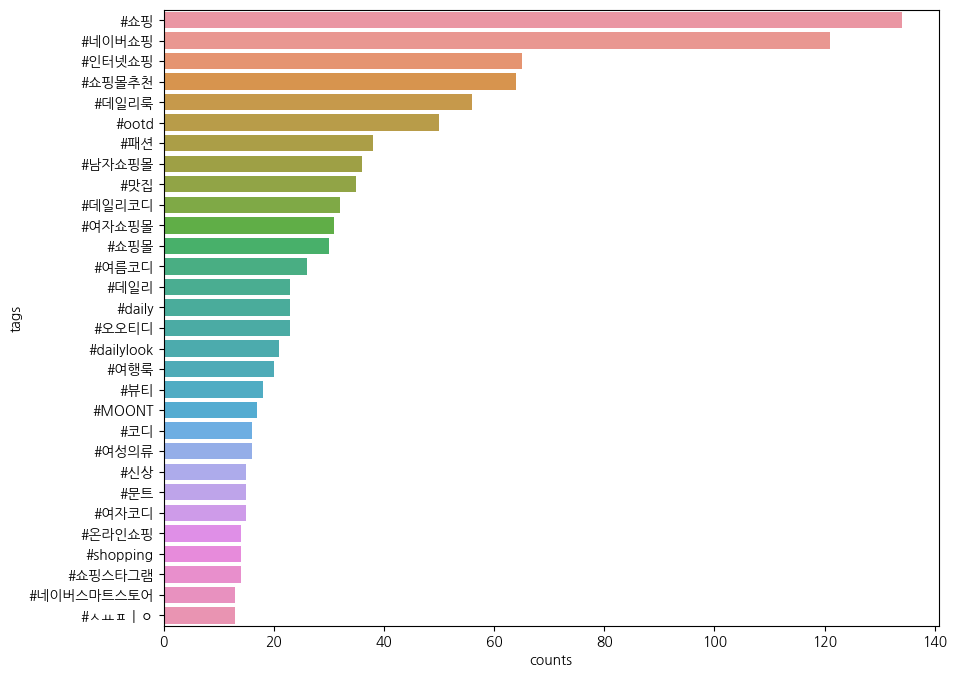

In [66]:
# 막대 차트 그리기
plt.figure(figsize = (10, 8))

sns.barplot(x = 'counts', y = 'tags', data = tag_counts_df)

In [69]:
# 워드 클라우드를 위한 패키지 불러오기
from wordcloud import WordCloud
import platform

In [71]:
# 워드 클라우드에 필요한 글꼴 지정
# 윈도우의 경우
if platform.system() == 'Windows':
    font_path = "c:/Windows/Fonts/malgun.ttf"

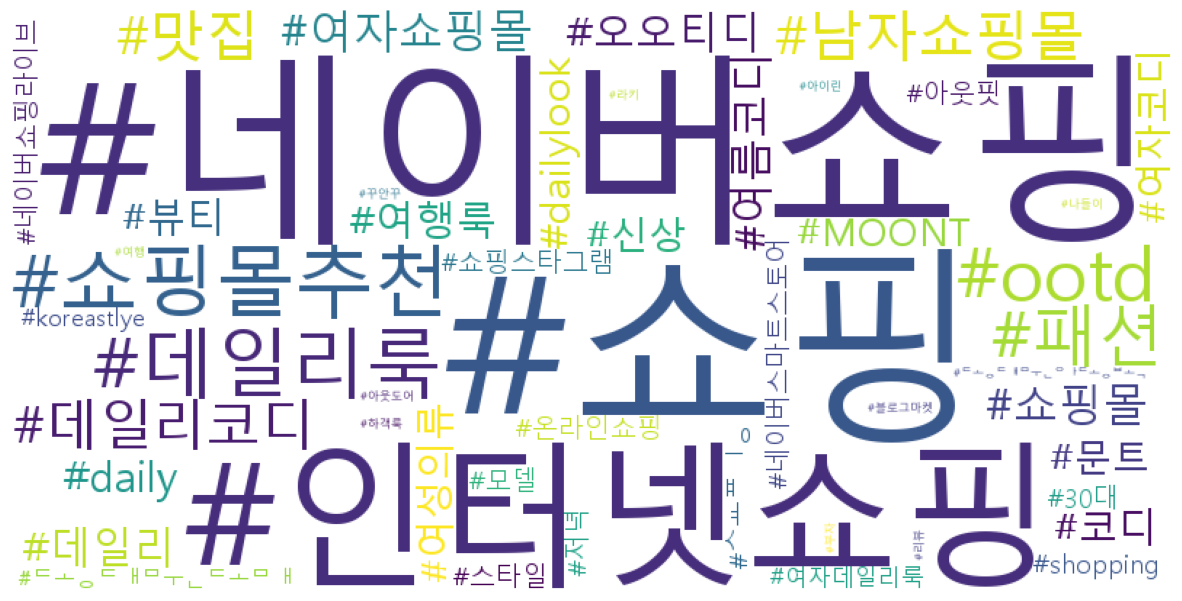

In [75]:
# 워드 클라우드 만들기
wordcloud=WordCloud(font_path= font_path,	# 사용할 글꼴 경로 
                    background_color="white",	# 배경색
                    max_words=50,		# 최대 몇 개의 단어를 나타낼 것인지 설정
                    relative_scaling= 0.3, 	# 워드 클라우드 내 글자들의 상대적인 크기(0~1)
                    width = 800,		# 워드클라우드 가로
                    height = 400		# 워드클라우드 세로
                 ).generate_from_frequencies(tag_counts_selected)
plt.figure(figsize = (15, 10))
plt.imshow(wordcloud)
plt.axis('off')
# 원하는 경로에 워드 클라우드 이미지 파일 저장
plt.savefig('./tag-wordcloud_shopping1.png')